<a href="https://colab.research.google.com/github/manuelagutierrezc/PROJECT_AI/blob/main/01_Classifying_Spambase_Proyecto_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto de Inteligenica Artificial - Introducción a la Inteligencia Artificial**

## Clasificación de tipos de email de SPAM (no Ham) y no SPAM (Ham)

Integrantes: Manuela Gutiérrez Cano, Daniel Esteban Maya Portillo, Nilson Suárez Hernández



<a href="https://githubtocolab.com/EstebanMa12/IA/blob/main/01%20-%20Classifying_Spambase_Proyecto_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **1. Preprocesado y limpieza de los datos**

En la primera etapa del proceso de la tarea de clasificación de los correos deseados y no deseados, es decir, ham y no ham, respectivamente, es necesario preprocesar y limpiar los datos a fin de que estos estén en las condiciones ideales o necesarias para que los modelos de Machine Learning puedan realizar predicciones correctas sobre este tema.

1. Se cargan los datos, cuya fuente es https://www.kaggle.com/datasets/colormap/spambase, disponible en la página oficial de *Kaggle*.

2. Se debe cumplir con las condiciones de la base de datos que son:

* Al menos 5000 instancias o muestras.
* Al menos 30 características.
* Al menos el 10% de las caracteristicas han de ser categoricas. 
* Al menos el 5% de datos faltantes en al menos 3 columnas.

Para ello, la base de datos que tenemos tiene 4601 muestras, 58 características y ninguna variable categorica, entonces se decide generar más muestras y así también poder conseguir el porcentaje necesario de datos faltantes.



In [ ]:
! pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**NOTA:** Antes de ejecutar la siguiente celda es necesario tener el archivo .json que contiene las credenciales de usuario de Kaggle, esto con el fin de poder descargar los datos desde Kaggle. Para obtener este archivo seguir los siguientes pasos:
1. Ir a la página de Kaggle, autenticarse e ir al perfil.
2. Seleccionar la pestaña Account.
3. Dar click en el botón Create New API Token y abrir el archivo, allí aparecerán los datos username y key.  

In [ ]:
# Ejecutar una sola vez
import opendatasets as od
dataset = "https://www.kaggle.com/datasets/colormap/spambase"
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: manuelagutirrezcano
Your Kaggle Key: ··········


100%|██████████| 138k/138k [00:00<00:00, 20.8MB/s]

In [ ]:
import os
data_dir = './spambase'
os.listdir(data_dir)

['spambase.csv']

In [ ]:
datos = pd.read_csv('/content/spambase/spambase.csv')
datos

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
datos.shape

(4601, 58)

Categorización de las variables *char_freq_(, char_freq_[, char_freq_!, char_freq_$, char_freq_#*, dependiendo de los valores de cada columna

In [ ]:
valores1 = [-math.inf,4.5,7.5,math.inf]       # valores columna char_freq_(    
valores2 = [-math.inf,1.5,3.5,math.inf]       # valores columna char_freq_[
valores3 = [-math.inf,13.5,25.5,math.inf]     # valores columna char_freq_!
valores4 = [-math.inf,3.5,5,math.inf]         # valores columna char_freq_$
valores5 = [-math.inf,4.5,8.5,math.inf]       # valores columna char_freq_#
categorias = ['Baja','Media','Alta']# Se refiere a baja, valores menores a 4.5 en el caso de valores1, media son los valores entre 4.5 y 7.5 y la alta son los valores más altos que 7.5
#Y así con las siguientes variables
datos['char_freq_('] = pd.cut(x=datos['char_freq_('],bins=valores1,labels=categorias)
datos['char_freq_['] = pd.cut(x=datos['char_freq_['],bins=valores2,labels=categorias)
datos['char_freq_!'] = pd.cut(x=datos['char_freq_!'],bins=valores3,labels=categorias)
datos['char_freq_$'] = pd.cut(x=datos['char_freq_$'],bins=valores4,labels=categorias)
datos['char_freq_#'] = pd.cut(x=datos['char_freq_#'],bins=valores5,labels=categorias)
datos

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,Baja,Baja,Baja,Baja,Baja,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,Baja,Baja,Baja,Baja,Baja,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,Baja,Baja,Baja,Baja,Baja,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,Baja,Baja,Baja,Baja,Baja,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,Baja,Baja,Baja,Baja,Baja,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,Baja,Baja,Baja,Baja,Baja,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,Baja,Baja,Baja,Baja,Baja,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,Baja,Baja,Baja,Baja,Baja,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,Baja,Baja,Baja,Baja,Baja,1.147,5,78,0


En la siguiente celda se crea un dataframe que permite completar el número de muestras requeridos y también permite que tenga datos faltantes.

In [ ]:
index = []
data1 = []
for i in range(4601,5000):
  index.append(i)
data = np.zeros([len(index),57])
for j in range(data.shape[0]):
   data[j] = np.nan
df = pd.DataFrame(data=data,index=index)
for k in index:
  if k%2 == 0:
    data1.append(1)
  else:
    data1.append(0)
df1 = pd.DataFrame(data=data1,index=index)
df2 = pd.concat([df,df1],axis=1)
df2.columns = datos.columns
df2

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Se concatenan los dos dataframes anteriores para obtener un sólo dataframe para preprocesarlo y limpiarlo, y se cumple con la condición de las variables categóricas. 

In [ ]:
data = pd.concat([datos,df2],axis=0)
data['char_freq_('][data['char_freq_('].isna()] = np.random.choice(['Baja','Media','Alta'],1)[0]
data['char_freq_['][data['char_freq_['].isna()] = np.random.choice(['Baja','Media','Alta'],1)[0]
data['char_freq_!'][data['char_freq_!'].isna()] = np.random.choice(['Baja','Media','Alta'],1)[0]
data['char_freq_$'][data['char_freq_$'].isna()] = np.random.choice(['Baja','Media','Alta'],1)[0]
data['char_freq_#'][data['char_freq_#'].isna()] = np.random.choice(['Baja','Media','Alta'],1)[0]
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,Baja,Baja,Baja,Baja,Baja,3.756,61.0,278.0,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,Baja,Baja,Baja,Baja,Baja,5.114,101.0,1028.0,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,Baja,Baja,Baja,Baja,Baja,9.821,485.0,2259.0,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,Baja,Baja,Baja,Baja,Baja,3.537,40.0,191.0,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,Baja,Baja,Baja,Baja,Baja,3.537,40.0,191.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Alta,Alta,Media,Baja,Media,NaN,NaN,NaN,0
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Alta,Alta,Media,Baja,Media,NaN,NaN,NaN,1
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Alta,Alta,Media,Baja,Media,NaN,NaN,NaN,0
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Alta,Alta,Media,Baja,Media,NaN,NaN,NaN,1


## **1.2 Confirmación de las variables categóricas y númericas**##


In [ ]:
## NUMERICAL VARIABLES
num=data._get_numeric_data().describe().T
num

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601.0,0.104553,0.305358,0.0,0.000,0.000,0.000,4.540
word_freq_address,4601.0,0.213015,1.290575,0.0,0.000,0.000,0.000,14.280
word_freq_all,4601.0,0.280656,0.504143,0.0,0.000,0.000,0.420,5.100
word_freq_3d,4601.0,0.065425,1.395151,0.0,0.000,0.000,0.000,42.810
word_freq_our,4601.0,0.312223,0.672513,0.0,0.000,0.000,0.380,10.000
word_freq_over,4601.0,0.095901,0.273824,0.0,0.000,0.000,0.000,5.880
word_freq_remove,4601.0,0.114208,0.391441,0.0,0.000,0.000,0.000,7.270
word_freq_internet,4601.0,0.105295,0.401071,0.0,0.000,0.000,0.000,11.110
word_freq_order,4601.0,0.090067,0.278616,0.0,0.000,0.000,0.000,5.260
word_freq_mail,4601.0,0.239413,0.644755,0.0,0.000,0.000,0.160,18.180


In [ ]:
num.shape

(53, 8)

In [ ]:
## CATEGORICAL VARIABLES
ccols = [i for i in data.columns if not i in data._get_numeric_data()]
print(ccols)

['char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#']


In [ ]:
for c in ccols:
  print('%10s'%c, np.unique(data[c].dropna()))

char_freq_( ['Alta' 'Baja' 'Media']
char_freq_[ ['Alta' 'Baja' 'Media']
char_freq_! ['Alta' 'Baja' 'Media']
char_freq_$ ['Alta' 'Baja' 'Media']
char_freq_# ['Alta' 'Baja' 'Media']


Antes de comenzar hacer el preprocesamient de los datos se definen las variables X, Y que corresponden al conjunto de datos y a las etiquetas o a las salidas.

In [ ]:
X = data.iloc[:,0:57]   
Y = data.iloc[:,57]

Para empezar a realizar el preprocesamiento y la limpieza de los datos, primero se realiza la codificación OneHotEncoding de las variables con datos categóricos.

In [ ]:
cf1_dummy = pd.get_dummies(X['char_freq_('],prefix='char_freq_(')
cf2_dummy = pd.get_dummies(X['char_freq_['],prefix='char_freq_[')
cf3_dummy = pd.get_dummies(X['char_freq_!'],prefix='char_freq_!')
cf4_dummy = pd.get_dummies(X['char_freq_$'],prefix='char_freq_$')
cf5_dummy = pd.get_dummies(X['char_freq_#'],prefix='char_freq_#')

X1 = pd.concat([X,cf1_dummy,cf2_dummy,cf3_dummy,cf4_dummy,cf5_dummy],axis=1).drop(['char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#'],axis=1)
X1

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_[_Alta,char_freq_!_Baja,char_freq_!_Media,char_freq_!_Alta,char_freq_$_Baja,char_freq_$_Media,char_freq_$_Alta,char_freq_#_Baja,char_freq_#_Media,char_freq_#_Alta
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0,1,0,0,1,0,0,1,0,0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0,1,0,0,1,0,0,1,0,0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0,1,0,0,1,0,0,1,0,0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0,1,0,0,1,0,0,1,0,0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,1,0,0,0,1,0
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,1,0,0,0,1,0
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,1,0,0,0,1,0
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,1,0,0,0,1,0


Luego, se realiza el reemplazo de los datos faltantes del conjunto de datos. Para ello se utiliza la ténica *KNNImputer* que es un método para reemplazar los valores faltantes usando los *K* vecinos más cercanos. Todos los valores faltantes de las muestras son imputados usando el valor medio de los vecinos más cercanos encontrados en el conjunto de entrenamiento. Dos muestras son cercanas si las características que no son faltantes están cercanas. 

In [ ]:
from sklearn.impute import KNNImputer

imputador = KNNImputer(missing_values=np.nan,n_neighbors=5)
X2 = imputador.fit_transform(X1)
X2 = pd.DataFrame(X2)
X2.columns = X1.columns
X2

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_[_Alta,char_freq_!_Baja,char_freq_!_Media,char_freq_!_Alta,char_freq_$_Baja,char_freq_$_Media,char_freq_$_Alta,char_freq_#_Baja,char_freq_#_Media,char_freq_#_Alta
0,0.00,0.64,0.64,0.000,0.32,0.00,0.00,0.00,0.00,0.000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.21,0.28,0.50,0.000,0.14,0.28,0.21,0.07,0.00,0.940,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.06,0.00,0.71,0.000,1.23,0.19,0.19,0.12,0.64,0.250,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.00,0.00,0.00,0.000,0.63,0.00,0.31,0.63,0.31,0.630,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.00,0.00,0.00,0.000,0.63,0.00,0.31,0.63,0.31,0.630,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.00,0.00,0.00,0.008,0.00,0.00,0.00,0.00,0.00,0.868,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4996,0.00,0.00,0.00,0.008,0.00,0.00,0.00,0.00,0.00,0.868,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4997,0.00,0.00,0.00,0.008,0.00,0.00,0.00,0.00,0.00,0.868,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4998,0.00,0.00,0.00,0.008,0.00,0.00,0.00,0.00,0.00,0.868,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
final_data = pd.concat([X2,Y],axis=1)
final_data          # conjunto de datos que contiene los datos preprocesados 

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_!_Baja,char_freq_!_Media,char_freq_!_Alta,char_freq_$_Baja,char_freq_$_Media,char_freq_$_Alta,char_freq_#_Baja,char_freq_#_Media,char_freq_#_Alta,spam
0,0.00,0.64,0.64,0.000,0.32,0.00,0.00,0.00,0.00,0.000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
1,0.21,0.28,0.50,0.000,0.14,0.28,0.21,0.07,0.00,0.940,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,0.06,0.00,0.71,0.000,1.23,0.19,0.19,0.12,0.64,0.250,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
3,0.00,0.00,0.00,0.000,0.63,0.00,0.31,0.63,0.31,0.630,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4,0.00,0.00,0.00,0.000,0.63,0.00,0.31,0.63,0.31,0.630,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.00,0.00,0.00,0.008,0.00,0.00,0.00,0.00,0.00,0.868,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4996,0.00,0.00,0.00,0.008,0.00,0.00,0.00,0.00,0.00,0.868,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4997,0.00,0.00,0.00,0.008,0.00,0.00,0.00,0.00,0.00,0.868,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4998,0.00,0.00,0.00,0.008,0.00,0.00,0.00,0.00,0.00,0.868,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


## **2. Exploración de los datos**
En esta parte se pretende saber cómo se comportan los datos, para ello se debe saber como es la distribución por clases, ya que es un problema de clasificación, cuál es el número de muestras y de características, si corresponde a un problema balanceado o desbalanceado de acuerdo con la distribución de clases de la variable de salida, entre otros aspectos relevantes. 

In [ ]:
# número de muestras, característicasy clases
print('El número de muestras es:' , final_data.shape[0])
print('El número de características o variables es:', X2.shape[1])
print('El número de clases es:', len(np.unique(Y)))
print('Las clases son:', np.unique(Y))

El número de muestras es: 5000
El número de características o variables es: 67
El número de clases es: 2
Las clases son: [0 1]


In [ ]:
def numero_muestras_por_clase(Y):
  diccionario = {}
  clases = np.unique(Y)
  for j in range(len(clases)):
    diccionario[clases[j]] = 0
  for i in range(len(Y)):
    for j in range(len(clases)):
      if Y[i] == clases[j]:
        diccionario[clases[j]] = diccionario[clases[j]] + 1

  return (diccionario)

In [ ]:
numero_muestras_por_clase(Y)

{0: 2988, 1: 2012}

Como se evidencia en el diccionario anterior, existen dos clases para este problema que son la clase 0 y 1, es decir, no spam y spam, el tipo de correo. 

Se muestra que de la clase 0 hay 2988 muestras y de la clase 1 hay 2012 muestras, lo que evidencia que no hay un desbalance tan notorio entre las dos clases, ya que no hay una diferencia muy grande entre la cantidad de muestras y con esto, se puede decir que el problema es balanceado y se evita el problema de que la clase mayoritaria o la clase con mayor número de muestras se sesgue y evite que la clase minoritaria o de menor número de muestras sea o quede mal representada y por ende se puede decir que las predicciones que se hagan posteriormente utilizando los modelos de Machine Learning van arrojar predicciones más correctas.

Una represenación gráfica de la distribución de las muestras se muestra a continuación:

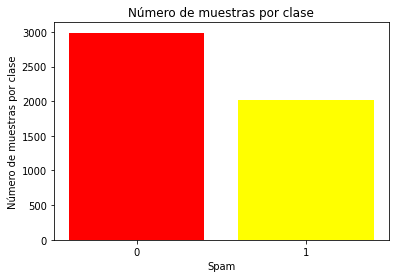

In [ ]:
fig, ax = plt.subplots()
colores = ["red","yellow"]
ax.bar(numero_muestras_por_clase(Y).keys(), numero_muestras_por_clase(Y).values(), color = colores)
ax.set_title("Número de muestras por clase")
ax.set_xlabel("Spam")
ax.set_ylabel("Número de muestras por clase")
ax.set_xticks(list(numero_muestras_por_clase(Y).keys()))
plt.show()

In [ ]:
sns.displot(final_data['spam']);

# **3. Elección del modelo de clasificación**
Despues de haber realizado un preprocesamiento y una respectiva exploración de los datos se procede a dar un intento de solución al problema de clasificación con los distintos modelos que existen. 

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              5000 non-null   float64
 1   word_freq_address           5000 non-null   float64
 2   word_freq_all               5000 non-null   float64
 3   word_freq_3d                5000 non-null   float64
 4   word_freq_our               5000 non-null   float64
 5   word_freq_over              5000 non-null   float64
 6   word_freq_remove            5000 non-null   float64
 7   word_freq_internet          5000 non-null   float64
 8   word_freq_order             5000 non-null   float64
 9   word_freq_mail              5000 non-null   float64
 10  word_freq_receive           5000 non-null   float64
 11  word_freq_will              5000 non-null   float64
 12  word_freq_people            5000 non-null   float64
 13  word_freq_report            5000 

In [ ]:
final_data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_!_Baja,char_freq_!_Media,char_freq_!_Alta,char_freq_$_Baja,char_freq_$_Media,char_freq_$_Alta,char_freq_#_Baja,char_freq_#_Media,char_freq_#_Alta,spam
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.096210,0.196016,0.25826,0.060842,0.287308,0.088248,0.105094,0.096892,0.082880,0.289661,...,0.91980,0.08000,0.000200,0.999200,0.000200,0.00060,0.919200,0.080400,0.000400,0.402400
std,0.294285,1.239345,0.48955,1.338407,0.650642,0.263952,0.376768,0.385790,0.268378,0.641629,...,0.27163,0.27132,0.014142,0.028276,0.014142,0.02449,0.272555,0.271939,0.019998,0.490431
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.00000,0.00000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.00000,0.00000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.37000,0.000000,0.330000,0.000000,0.000000,0.000000,0.000000,0.410000,...,1.00000,0.00000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000
max,4.540000,14.280000,5.10000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,1.00000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


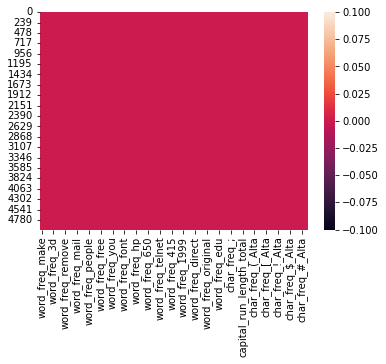

In [ ]:
sns.heatmap(final_data.isnull())

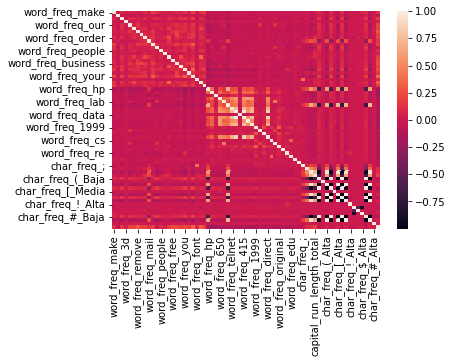

In [ ]:
#Matriz de correlación
sns.heatmap(final_data.corr())

In [ ]:
from sklearn.model_selection import train_test_split

A partir del dataset obtenido se busca obtener una parte para un set de entrenamiento y otra parte como set de prueba.
70% y 30% respectivamente

In [ ]:
data_train, data_test= train_test_split(final_data, train_size=0.7, random_state=1)
data_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_!_Baja,char_freq_!_Media,char_freq_!_Alta,char_freq_$_Baja,char_freq_$_Media,char_freq_$_Alta,char_freq_#_Baja,char_freq_#_Media,char_freq_#_Alta,spam
1334,0.00,0.0,0.00,0.000,0.00,0.0,0.0,0.0,0.0,3.770,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4768,0.00,0.0,0.00,0.008,0.00,0.0,0.0,0.0,0.0,0.868,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
65,0.66,0.0,0.66,0.000,0.00,0.0,0.0,0.0,0.0,0.660,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
177,0.44,0.0,0.00,0.000,0.89,0.0,0.0,0.0,0.0,0.440,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4489,0.35,0.0,0.71,0.000,0.00,0.0,0.0,0.0,0.0,0.350,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


In [ ]:
X = data_train.drop(['spam'],axis=1)
y = data_train['spam']

X_test = data_test.drop(['spam'], axis = 1)
y_test = data_test['spam']

## **3.1 Logistic Regression**

In [ ]:
pip install mlutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for mlutils: filename=mlutils-0.2.0b0-py3-none-any.whl size=12077 sha256=fa08707025da99a6a6af0f31b183df6519f87a20e3fadb3420bde4beae1847ac
  Stored in directory: /root/.cache/pip/wheels/12/27/e8/f030cd7c704a8ded7bda36af8671a6344d70cc52f324318fda
Successfully built mlutils


In [ ]:
from sklearn.linear_model import LogisticRegression
import mlutils

In [ ]:
modelLR= LogisticRegression(solver='liblinear', max_iter=10000)

modelLR.fit(X,y);
modelLR.score(X,y)

0.8905714285714286